# Rb87 Polarizability Calcs

The tensor polarizability function uses Mark's derived result for linear light polarized along z (to be extended for other polarizations). The vector polarizability is from "Dynamical polarizability of atoms in arbitrary light fields: 
general theory and application to cesium"  by Rauscenbeutel.

#### Rules to remember:
Scalar shift: no dependence on light polarization <br/>
Vector shift: zero for linear light or $j_a=0$ <br/>
Tensor shift: non-zero iff $j_a\geq1$ <br/>

In [1]:
# %matplotlib inline

#### libraries
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from arc import *
from sympy.physics.wigner import wigner_6j,wigner_3j,clebsch_gordan

#### local files
import sys, os
sys.path.append('..\\')
sys.path.append('..\\utilities')
from physconsts import *
from rbconsts import *
from amophys import * #_testing import * # polarizability functions live here
from simfuncs import *

#### other
mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def smart_pts(func, domain, default_res=10, alpha=1, dx_test=None):
    """
    Get list of func and pts at which func is evaluated.
    
    Evaluates more points in region where func is changing rapidly than where
    the derivative is small, to avoid the need to use high resolution steps 
    over the whole domain.
    
    Args:
        func(x: float):->float
        domain: two element list-like of floats [xmin, xmax]
        default_res: the number of points to use when the derivative is near zero
        alpha: a tuning parameter. higher is better for sharply changing functions
    Return
        xpts,func_pts,: the points at which func was evaluated and func evaluated at those points
    """
    xmin,xmax = domain
    dx = (xmax-xmin)/default_res
    
    if dx_test == None:
        dx_test = dx/1000 # very small step to approximate derivative using next step

    x = xmin
    xpts = [x]
    func_pts = [func(x)] # can't use np array because don't know size in advance
    last_df = 0
    
    while x < xmax:
        
        df = abs((func(x+dx_test) - func(x))/(dx_test))
        # TODO: add in code to check if probe is small enough
        
        
        x += dx*exp(-alpha*df) # should go to dx when slope zero
        xpts.append(x)
        func_pts.append(func(x))
    
    return array(xpts),array(func_pts)

In [ ]:
x,f = smart_pts(lambda x: 1/(1+(100*x)**2),[-10,10],default_res=30,alpha=1)

In [ ]:
plt.scatter(x,f,linewidths=0.5)
plt.plot(x,f)
plt.show()

## references
the correct definitions for polarizabilities can be found in "Dynamical polarizability of atoms in arbitrary light fields: 
general theory and application to cesiu" by Rauschenbeutel. I use their definitions with some 
combination of the expressions as they are presented in Mark's notes."

#### Rules to remember:
Scalar shift: no dependence on light polarization <br/>
Vector shift: zero for linear light or $j_a=0$ <br/>
Tensor shift: non-zero for $j_a\geq1$ <br/>

## Network experiment
summarized from test notebook, with corrections/additions

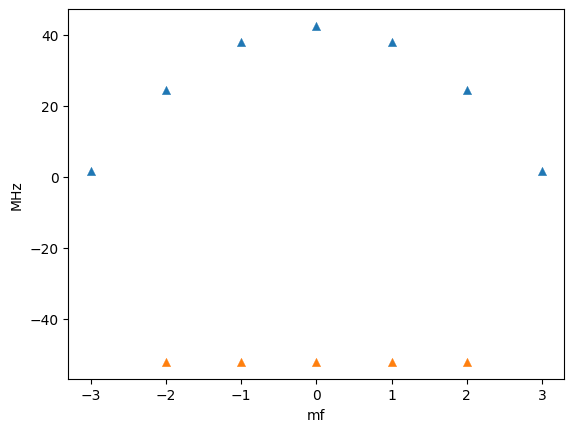

In [17]:
rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/852e-9
TFORT = 2.1e-3

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05S = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0

E = sqrt(4*kB*TFORT/a05S) # get field from ground state shift, which defines trap depth
mfg_list = arange(-f,f+1)
scalar_g = [-(1/4)*a05S*E**2/(hbar*1e6*2*pi) for mf in mfg_list]


# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a05P = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a25P = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]
tensor_e = [-1/4*( a05P+ (3*mf**2-f*(f+1))/(1*f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

fig, ax = plt.subplots()
ax.scatter(mfe_list, tensor_e, marker='^',linewidths=0.3)
ax.scatter(mfg_list, scalar_g, marker='^',linewidths=0.3)
# ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
plt.show()

In [18]:
np.mean(tensor_e) - np.mean(scalar_g)

76.40701477438067

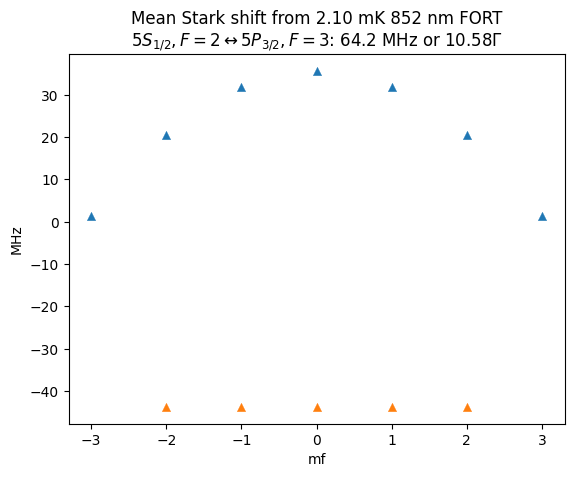

In [43]:
rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/852e-9
TFORT = 2.1e-3

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05S = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0

E = sqrt(4*kB*TFORT/a05S) # get field from ground state shift, which defines trap depth
mfg_list = arange(-f,f+1)
scalar_g = [-(1/4)*a05S*E**2/(hbar*1e6*2*pi) for mf in mfg_list]


# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a05P = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a25P = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]
tensor_e = [-1/4*( a05P+ (3*mf**2-f*(f+1))/(1*f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

fig, ax = plt.subplots()
ax.scatter(mfe_list, tensor_e, marker='^',linewidths=0.3)
ax.scatter(mfg_list, scalar_g, marker='^',linewidths=0.3)
ax.set_title(f"Mean Stark shift from {TFORT*1e3:.2f} mK 852 nm FORT\n"+r"$5S_{1/2},F=2 \leftrightarrow 5P_{3/2},F=3$:"+rf" {(np.mean(tensor_e) - np.mean(scalar_g)):.1f} MHz or {(np.mean(tensor_e) - np.mean(scalar_g))/6.065:.2f}$\Gamma$")
# ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
plt.show()

In [34]:
1/(2*pi*6.065e6)

2.6241540493305083e-08

In [36]:
1/(2*pi*26e-9)

6121343.965072897

In [29]:
2/(26e-9)

76923076.92307691

In [14]:
(np.mean(tensor_e) - np.mean(scalar_g))/6.062

10.083406766661916

In [11]:
# compute differential shifts

rb = Rubidium87()
nlist = range(4,25)
omega = 2*pi*c/(852e-9)
TFORT = 1e-3

n1=5; l1=0; j1=1/2; f1=1; mf1=-1;
a05S_1 = alpha0_hf([n1,l1,j1,f1], omega, nlist, atom=rb, I=I) #alpha_0

n2=5; l2=0; j2=1/2; f2=2; mf=1;
a05S_2 = alpha0_hf([n2,l2,j2,f2], omega, nlist, atom=rb, I=I) #alpha_0

E = sqrt(4*kB*TFORT/a05S_1) # get field from ground state shift, which defines trap depth
diff_shift = -(1/4)*(a05S_2 - a05S_1)*E**2/(hbar*2*pi)

print("differential shift:",diff_shift/1e3,"kHz")

differential shift: -2320.5278797442174 kHz


In [32]:
# compute the differential shift in a simple-minded way
d1 = 2*pi*c*(1/794.978850e-9 - 1/852e-9)
d2 = 2*pi*c*(1/780.241209e-9 - 1/852e-9)
d_eff = 1/((1/d1 + 2/d2)/3) # weighted average of D lines. 
# see Oscillator strengths of the principal series lines of Rb", table 3

omega_hfs = 2*pi*6.834682e9

eta = omega_hfs/d_eff # see "Analysis of dephasing mechanisms in a standing-wave dipole trap" by Meschede group
diff_shift = eta*TFORT*kB/hbar
print("diff. shift ~",diff_shift/(2*pi))

diff. shift ~ 4814.841492582989


## Tests
summarized from test notebook, with corrections/additions

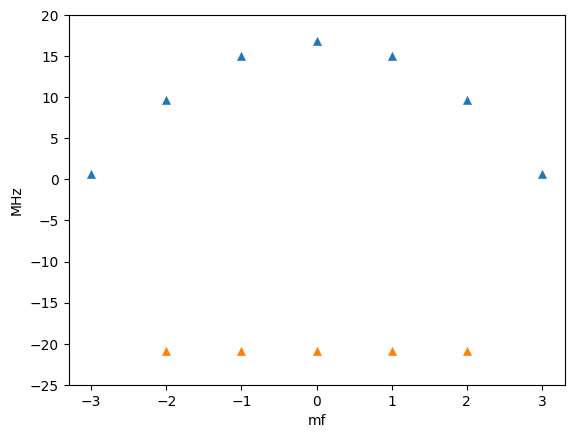

In [7]:
# reproduce values from Kurtseifer PGC paper fig. 1a (PHYSICAL REVIEW A 96, 033406 (2017))
# this result gets the correct result but there may be some cancellation of errors here.

rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/851e-9
TFORT = 1e-3

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05S = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0

E = sqrt(4*kB*TFORT/a05S) # get field from ground state shift, which defines trap depth
mfg_list = arange(-f,f+1)
scalar_g = [-(1/4)*a05S*E**2/(hbar*1e6*2*pi) for mf in mfg_list]


# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a05P = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a25P = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]
tensor_e = [-1/4*( a05P+ (3*mf**2-f*(f+1))/(1*f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

fig, ax = plt.subplots()
ax.scatter(mfe_list, tensor_e, marker='^',linewidths=0.3)
ax.scatter(mfg_list, scalar_g, marker='^',linewidths=0.3)
ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
plt.show()

In [6]:
C

0.0

In [11]:
D

1

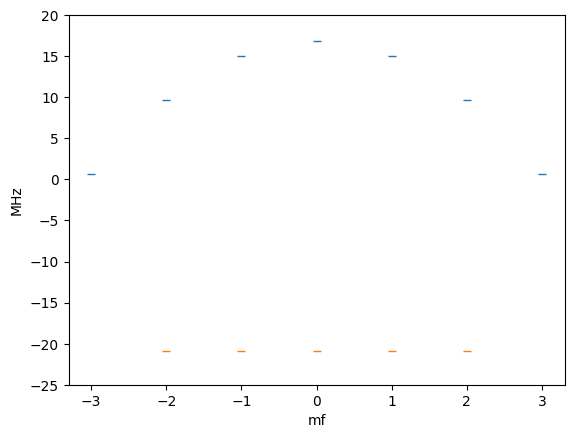

In [93]:
"""reproduce values from Kurtseifer PGC paper fig. 1a (PHYSICAL REVIEW A 96, 033406 (2017))
the result for linear polarization if I assume that the Kurtseifer paper implicitly
chose x to be the quantization axis (i.e. my z is their x). however, the result for sigma 
polarized light does not agree with theirs. I suspect the their is maybe
some inconsistency in the way the quantization axis is defined. their 
sigma polarized light is not an orthogonal state to their pi light, 
so it should be sigma expressed in, e.g. the x basis. but this would mean
uy or ux in the z basis is 0, and the coefficient for the tensor shift 
vanishes."""

rb = Rubidium87()
nlist = range(4,20)
# omega = 2*pi*c/1.064e-6
omega = 2*pi*c/851e-9
TFORT = 1e-3


"""account for the polarization in the Stark shift"""
# Spherical
# u_minus = 0
# u_plus = 0
# u_0 = 1
# C = abs(u_minus)**2 - abs(u_plus)**2 
# D = 1 - 3*abs(u_0)**2

# Cartesian
ux,uy,uz = (1+0j,0+1j,0+0j)/sqrt(2) # sigma light z in basis
ux,uy,uz = (0+0j,1+0j,0+1j)/sqrt(2) # sigma light x in basis
# ux,uy,uz = (1+0j,0+0j,0+0j) # x polarized
ux,uy,uz = (0+0j,0+0j,1+0j) # z polarized
C = 2*(ux.conjugate()*uy).imag
D = 1 - 3*abs(uz)**2

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a0_5S12 = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a1_5S12 = alpha1_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
E = sqrt(4*kB*TFORT/a0_5S12) # get field from ground state shift, which defines trap depth
mfg_list = arange(-f,f+1)
shifts_g = [-(1/4)*(a0_5S12 + C*(mf/(2*f))*a1_5S12)*E**2/(hbar*1e6*2*pi) for mf in mfg_list]

# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a0_5P32 = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)  
a1_5P32 = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a2_5P32 = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]

# scalar, vector, tensor AC Stark shift
shifts_e = [-1/4*(a0_5P32 + C*(mf/(2*f))*a1_5P32 - D*(3*mf**2-f*(f+1))/(2*f*(2*f-1))*a2_5P32)*E**2/hbar/1e6/2/pi for mf in mfe_list]

fig, ax = plt.subplots()
ax.scatter(mfe_list, shifts_e, marker='_',linewidths=1)
ax.scatter(mfg_list, shifts_g, marker='_',linewidths=1)
ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
plt.show()

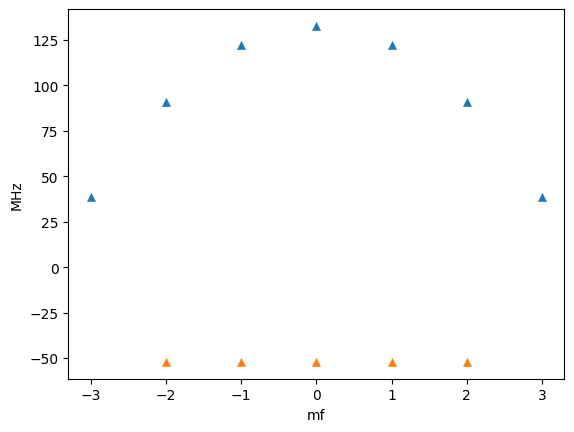

In [84]:
rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/1.064e-6 # for Omar's paper
TFORT = 2.5e-3

"""account for the polarization in the Stark shift"""
# Spherical
# u_minus = 0
# u_plus = 0
# u_0 = 1
# C = abs(u_minus)**2 - abs(u_plus)**2 
# D = 1 - 3*abs(u_0)**2

# Cartesian
# ux,uy,uz = (1+0j,0+1j,0+0j)/sqrt(2) # sigma light z in basis
# ux,uy,uz = (1+0j,0+0j,0+0j) # x polarized
ux,uy,uz = (0+0j,0+0j,1+0j) # z polarized
C = 2*(ux.conjugate()*uy).imag
D = 1 - 3*abs(uz)**2

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a0_5S12 = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a1_5S12 = alpha1_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
E = sqrt(4*kB*TFORT/a0_5S12) # get field from ground state shift, which defines trap depth
mfg_list = arange(-f,f+1)
shifts_g = [-(1/4)*(a0_5S12 + C*(mf/(2*f))*a1_5S12)*E**2/(hbar*1e6*2*pi) for mf in mfg_list]

# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a0_5P32 = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)  
a1_5P32 = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)
a2_5P32 = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]

# scalar, vector, tensor AC Stark shift
shifts_e = [-1/4*(a0_5P32 + C*(mf/(2*f))*a1_5P32 - D*(3*mf**2-f*(f+1))/(2*f*(2*f-1))*a2_5P32)*E**2/hbar/1e6/2/pi for mf in mfe_list]
# shifts_e = [-1/4*( a05P + D*(3*mf**2-f*(f+1))/(f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

fig, ax = plt.subplots()
ax.scatter(mfe_list, shifts_e, marker='^',linewidths=0.3)
ax.scatter(mfg_list, shifts_g, marker='^',linewidths=0.3)
# ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
plt.show()

In [70]:
[x/y for x,y in zip(np.array(shifts_e),np.array([50,100,150,160,150,100,50]))]

[0.7740553326889479,
 0.9087083483404477,
 0.8144778383586881,
 0.8287830587107669,
 0.8144778383586881,
 0.9087083483404477,
 0.7740553326889479]

In [86]:
shifts_e[1]-shifts_e[0],shifts_e[2]-shifts_e[0],shifts_e[3]-shifts_e[0]

(52.16806819959738, 83.46890911935583, 93.90252275927531)

dipole trap power 0.84mW for waist 0.75um
mean differential shift = 30.41MHz blue of 5S1/2,F=2 - 5P3/2,F=3


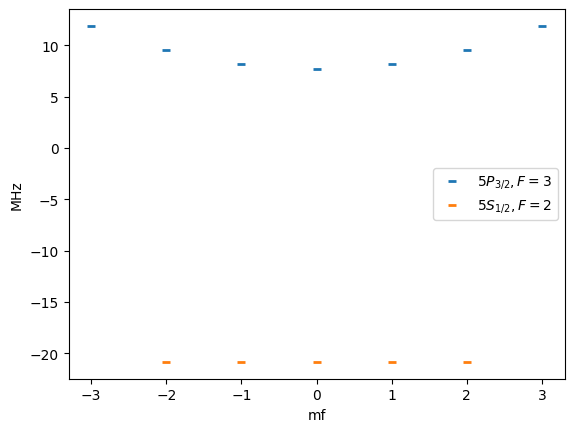

In [4]:
# quantum network experiment, circa Sept. 2023
rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/852e-9
TFORT = 1e-3

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05S = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0
E = sqrt(4*kB*TFORT/a05S) # get field from ground state shift, which defines trap depth
w0 = 7.5e-7
I0 = 0.5*e0*c*E**2
P = 0.5*I0*pi*w0**2
print(f"dipole trap power {P*1e3:.2f}mW for waist {w0*1e6:.2f}um")
mfg_list = arange(-f,f+1)
scalar_g = [-(1/4)*a05S*E**2/(hbar*1e6*2*pi) for mf in mfg_list]

# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a05P = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)  
a25P = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]
tensor_e = [-1/4*( a05P + (3*mf**2-f*(f+1))/(1*f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

mean_diff_shift_MHz = np.mean(tensor_e) - np.mean(scalar_g)
print(f"mean differential shift = {mean_diff_shift_MHz:.2f}MHz blue of 5S1/2,F=2 - 5P3/2,F=3")

fig, ax = plt.subplots()
ax.scatter(mfe_list, tensor_e, marker='_',linewidths=2,label=r'$5P_{3/2},F=3$')
ax.scatter(mfg_list, scalar_g, marker='_',linewidths=2,label=r'$5S_{1/2},F=2$')
# ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
ax.legend()
plt.show()

dipole trap power 2.30mW for waist 0.75um
mean differential shift = 30.56MHz blue of 5S1/2,F=2 - 5P3/2,F=3


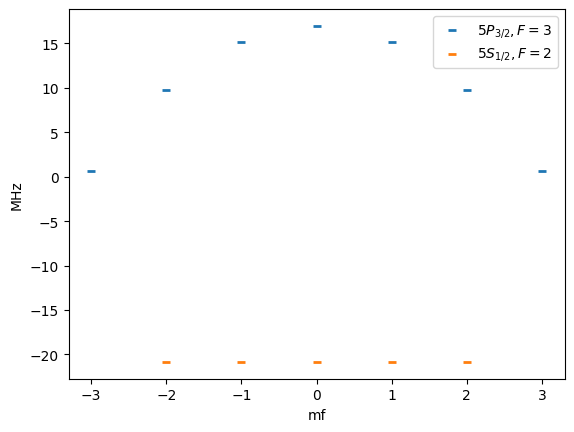

In [34]:
# we don't know exactly how much 852 power couples into the fiber, so let's say it's 50% +30%/-20%
rb = Rubidium87()
nlist = range(4,20)
omega = 2*pi*c/852e-9
TFORT = 1e-3

# state g = 5S1/2,f=2
n=5; l=0; j=1/2; f=2; mf=0;
a05S = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0

E = sqrt(4*kB*TFORT/a05S) # get field from ground state shift, which defines trap depth
w0 = 7.5e-7
I0 = 0.5*e0*c*E**2
P = 0.5*I0*pi*w0**2
print(f"dipole trap power {P*1e3:.2f}mW for waist {w0*1e6:.2f}um")
mfg_list = arange(-f,f+1)
scalar_g = [-(1/4)*a05S*E**2/(hbar*1e6*2*pi) for mf in mfg_list]

# state e = 5P3/2,f=3
n=5; l=1; j=3/2; f=3;
a05P = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)  
a25P = alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)

mfe_list = [mf for mf in arange(-f,f+1)]
tensor_e = [-1/4*( a05P + (3*mf**2-f*(f+1))/(1*f*(2*f-1))*a25P)*E**2/hbar/1e6/2/pi for mf in mfe_list]

mean_diff_shift_MHz = np.mean(tensor_e) - np.mean(scalar_g)
print(f"mean differential shift = {mean_diff_shift_MHz:.2f}MHz blue of 5S1/2,F=2 - 5P3/2,F=3")

fig, ax = plt.subplots()
ax.scatter(mfe_list, tensor_e, marker='_',linewidths=2,label=r'$5P_{3/2},F=3$')
ax.scatter(mfg_list, scalar_g, marker='_',linewidths=2,label=r'$5S_{1/2},F=2$')
# ax.set_ylim(-25,20)
ax.set_ylabel('MHz')
ax.set_xlabel('mf')
ax.legend()
plt.show()

## misc Rb 

In [112]:
# atom
rb = Rubidium87()

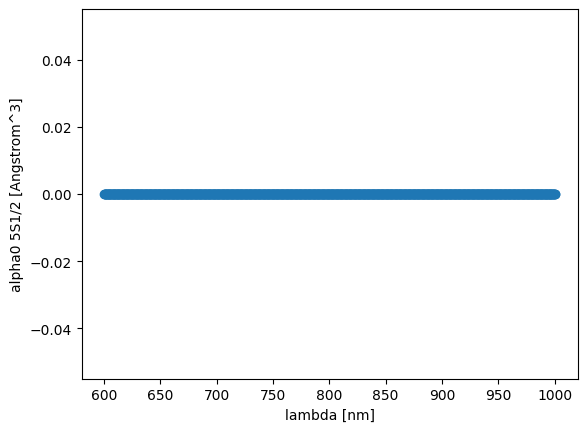

In [132]:
# 5S1/2,f=0
n=5; l=0; j=1/2; f=1; mf=0;

nlist = range(4,50)
a0 = lambda l: alpha0_hf([n,l,j,f], (2*pi*c/l*1e-9), nlist, atom=rb, I=I)
lambda_arr,a0_pts = smart_pts(a0,[600,1000],default_res=1000,alpha=2,dx_test=0.00001)

fig, ax = plt.subplots()
ax.scatter(lambda_arr,a0_pts/(4*pi*e0*1e-30))
# ax.set_ylim((-6000,6000))
ax.set_ylabel("alpha0 5S1/2 [Angstrom^3]")
ax.set_xlabel("lambda [nm]")
plt.show()

In [133]:
len(lambda_arr)

1002

In [1]:
## polarizability plot

nlist = range(4,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(800,1000,300)]

# 5S1/2,f=1
n=5; l=0; j=1/2; f=1; mf=0;
a05Spts = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_0

NameError: name 'linspace' is not defined

In [2]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts)/(4*pi*e0*1e-30))
#ax.set_ylim((-200,200))
plt.show()

NameError: name 'plt' is not defined

In [34]:
## polarizability plot

nlist = range(5,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(800,1000,300)]

# 5P3/2,f=0
n=5; l=1; j=3/2; f=0; mf=0;
a05Spts = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list]

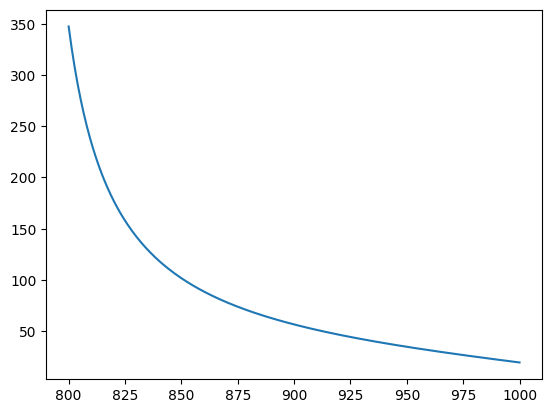

In [35]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts)/(4*pi*e0*1e-30))
# ax.set_ylim((-300,300))
plt.show()

In [37]:
## polarizability plot

nlist = range(5,50)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(800,1000,300)]

# 5S1/2,f=1
n=5; l=0; j=1/2; f=1; mf=0;
a05Spts1 = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_0

# 5P3/2,f=0
n=5; l=1; j=3/2; f=0; mf=0;
a05Spts2 = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list]

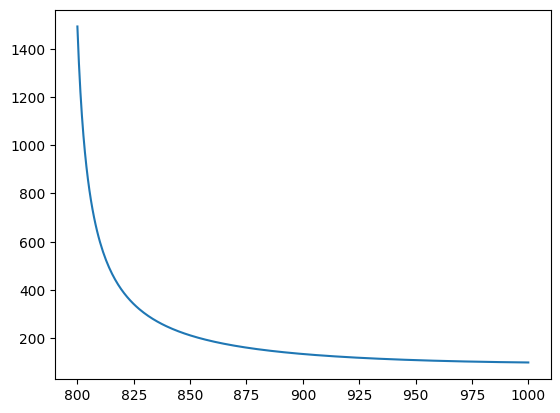

In [38]:
fig, ax = plt.subplots()
lambda_arr = array([2*pi*c/omega for omega in omega_list])
ax.plot(lambda_arr/1e-9,array(a05Spts1)/(4*pi*e0*1e-30)-array(a05Spts2)/(4*pi*e0*1e-30))
# ax.set_ylim((-300,300))
plt.show()

In [4]:
## polarizability plot 5S1/2,f=1 to 5P1/2,f=1

nlist = range(4,9)
omega_list = [2*pi*c/(l*1e-9) for l in linspace(852,900,100)] # rad/s

# 5S1/2,f=1
n=5; l=0; j=1/2; f=1; mf=1;
a05S0 = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_0
a05S2 = [alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_2
a05St = a05S0 + multiply(2*(3*mf**2-f*(f+1))/(2*f*(2*f-1)),a05S2)
# 5P1/2,f=1
n=5; l=1; j=1/2; f=1; mf=0;
a05P0 = [alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_0
a05P2 = [alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I) for omega in omega_list] #alpha_2
a05Pt = a05S0 + multiply(2*(3*mf**2-f*(f+1))/(2*f*(2*f-1)),a05S2)

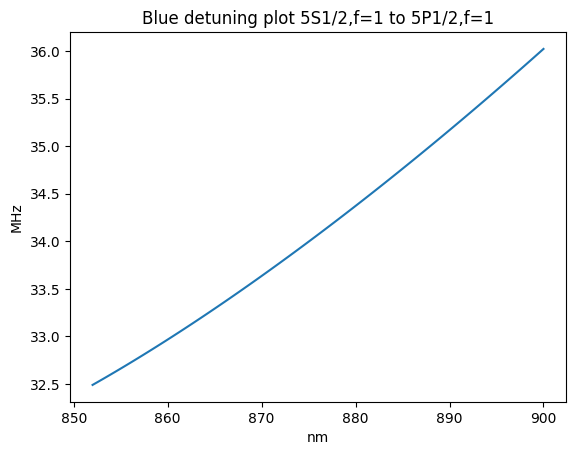

The minimum blue detuning is 32.489008205670984 MHz at a dipole trap frequency 351.8690821596244 THz, wavelength 852.0 nm
The powe of dipole trap should be 24.94542175488668 mW
Preparation of Bell states has a blue detuning of 90.51058754469986 MHz


In [5]:
w0 = 1.65e-6
Ufort = kB*1e-3
P_list = sqrt(divide(4*Ufort*e0*c*pi*w0**2/2,a05S0))
E_list = sqrt(divide(4*Ufort,a05S0))
energydiff = multiply(-1/4,multiply(a05P0-a05Pt,E_list**2))
enefreq = energydiff/(hbar*2*pi)/1e6
lambda_arr = array([2*pi*c/omega for omega in omega_list]) # in Hz
fig, ax = plt.subplots()
ax.plot(lambda_arr/1e-9, array(enefreq))
ax.set_xlabel('nm')
ax.set_ylabel('MHz')
ax.set_title('Blue detuning plot 5S1/2,f=1 to 5P1/2,f=1')
plt.show()
minenergy = min(enefreq)
minwave = lambda_arr[argmin(enefreq)] # in Hz
omega = omega_list[argmin(enefreq)] #rad/s
# 5S1/2,f=1
n=5; l=0; j=1/2; f=1; mf=0;
a05S0fix = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I) #alpha_0
# 5P3/2,f=0
n=5; l=1; j=3/2; f=0; mf=0;
a05P0fix = alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)  #alpha_0
E_fix = sqrt(4*Ufort/abs(a05P0fix))
P_fix = 4*Ufort*e0*c*pi*w0**2/2/a05S0fix
detun = -1/4*(a05P0fix-a05S0fix)*E_fix**2/(hbar*2*pi)/1e6
print('The minimum blue detuning is',minenergy,'MHz at a dipole trap frequency',c/minwave/1e12,'THz, wavelength',minwave/1e-9,'nm')
print('The powe of dipole trap should be',P_fix*1000,'mW')
print('Preparation of Bell states has a blue detuning of',detun,'MHz')

In [4]:
omega = 2*pi*c/(7.7e-7)

print("  5S1/2,f=2,mf=0:")
nlist = range(5,12)
n=5; l=0; j=1/2; f=2; mf=0;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")
print(f"    vector = {A*mf*alpha1_hf([n,l,j,f], omega, nlist, atom=rb, I=I)/(2*f)}")
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega, nlist, atom=rb, I=I)}")

  5S1/2,f=2,mf=0:
    scalar = -3.863073734163827e-75
  5P3/2,f=3,mf=1:
    scalar = 1.1426236852848684e-75
    vector = -1.7730550494904606e-38
    tensor = -4.646776330746171e-76


## Polarizabilities for Rydberg addressing

In [5]:
# atom
rb = Rubidium87()

# lasers
omega780A = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1)*1e9
omega780B = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1 + 6.834682)*1e9
omega480 = 2*pi*(eVToGHz(rb.getEnergy(84,2,5/2) - rb.getEnergy(5,1,3/2)) - .266651 + 2.1)*1e9

In [57]:
print("Laser frequencies")
print(f" 780A: 2*pi*{omega780A/(2*pi)}")
print(f" 780B: 2*pi*{omega780B/(2*pi)}")
print(f" 480: 2*pi*{omega480/(2*pi)}")

print("780A polarizabilities")

nlist = range(5,8)

print("  5S1/2,f=2,mf=0:")
n=5; l=0; j=1/2; f=2; mf=0;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")
print(f"    vector = {A*mf*alpha1_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)/(2*f)}")
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega780A, nlist, atom=rb, I=I)}")

print("480 polarizabilities")

print("  5S1/2,f=2,mf=0:")
n=5; l=0; j=1/2; f=2; mf=0;
nmax = 100; nmin = 5;
nlist = [int(x) for x in linspace(nmax,nmin,nmax-nmin+1)]
print(f"    scalar = {alpha0_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")
# vector is zero for mf=0
# tensor is zero for j<1

print("  5P3/2,f=3,mf=1:")
n=5; l=1; j=3/2; f=3; mf=1; A = 1;
print(f"    scalar = {alpha0_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")
print(f"    vector = {-A*mf*alpha1_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)/(2*f)}") # overall minus sign because dot(k,B_bias)=
print(f"    tensor = {-1*((3*mf**2 - f*(f+1))/(2*f*(2*f-1)))*alpha2_hf([n,l,j,f], omega480, nlist, atom=rb, I=I)}")

Laser frequencies
 780A: 2*pi*384226015203379.4
 780B: 2*pi*384232849885379.44
 480: 2*pi*625314831618150.4
780A polarizabilities
  5S1/2,f=2,mf=0:
    scalar = 3.20346392953120E-34
  5P3/2,f=3,mf=1:
    scalar = 1.52739309640219E-34
    vector = -3.817491143122172e-35
    tensor = -4.581457685120631e-35
480 polarizabilities
  5S1/2,f=2,mf=0:
    scalar = -2.90311524481040E-39
  5P3/2,f=3,mf=1:
    scalar = -4.82150951678205E-39
    vector = 1.696626924053701e-40
    tensor = 4.557481703934684e-40


In [54]:
alpha780excited = scalar = 1.52739309640219E-34 + -3.817491143122172e-35 + -4.581457685120631e-35
alpha780excited

6.874982135779098e-35

In [60]:
alpha480excited = 3.53496801131378E-39 + 4.27727148997324e-40 + -7.310403832277205e-40
alpha480excited

3.231654777083384e-39

In [6]:
## ponderomotive shifts, S.I. units

alphaPond = lambda omega: -ee**2/(me*omega**2)

In [7]:
alphaPond(omega780A)

-4.8350228219114005e-39

In [8]:
alphaPond(omega480)

-1.825469589864302e-39

## Ramsey frequency
Clock state Ramsey experiment with 780A on in gap time gives a fringe frequency equal to the differential AC Stark shift from the 780A plus the differential Zeeman shift. The latter is 4 kHz at 3 G. This can be used to determine the electric field that the atom sees. We can also estimate the Rabi frequency directly.

In [10]:
rb = Rubidium87()

# lasers
omega780A = 2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2] - 2.1)*1e9

# clock states differential AC stark shift = ramsey frequency - Zeeman shift
dU_ac = 2*pi*hbar*(1.34e6 - 4e3)

nlist = range(5,8)
efield = 2*sqrt(dU_ac/(alpha0_hf([5,0,1/2,2],omega780A,nlist,atom=rb,I=I)-alpha0_hf([5,0,1/2,1],omega780A,nlist,atom=rb,I=I)))
efield

3797.8949279380545

In [12]:
2*pi*c/omega780A

7.80250285346538e-07

In [13]:
2*pi*c/omega480

4.794264310414898e-07

In [22]:
2*pi*(hf_states[5][1][3/2][3] - hf_states[5][0][1/2][2])*1e9

2414176448051179.0

In [23]:
2*pi*(eVToGHz(rb.getEnergy(84,2,5/2) - rb.getEnergy(5,1,3/2)) - .266651)*1e9

3928955767695494.5